# Comparing How States Have Dealt With the  COVID-19 Pandemic
  Kian Afkhami


---
#1 Introduction
I am going to create various COVID plots to showcase COVID data from the U and New York State.


#2 Libraries 
The libraries I am using are:

*   pandas
*   matplot
*   re

Pandas is used for dataframes. matplot is used for creating plots. Re is used for regular expressions when parsing data.
More information about these can be found in extra resources

In [149]:

#from sklearn.linear_model import LinearRegression
#import seaborn as sns
#import statsmodels.api as sm
#from sklearn import linear_model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

#3 COVID Cases and Death Datasets/Plots 
The dataset I am using can be found in external resources. It contains one row for each date for each state, with case and death data for each row.


## 3.1 US COVID-19 Cases and Deaths Dataset

This dataset is from the CDC, more information and a link can be found in external resources. It contains some extra information, so it needs to be parsed.

In [122]:
states = pd.read_csv("United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv")
states.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/14/2022,KS,621273,470516.0,150757.0,19414,6964.0,7162,NaN,NaN,21,4.0,01/15/2022 02:59:30 PM,Agree,NaN
1,01/02/2022,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,01/03/2022 03:18:16 PM,NaN,NaN
2,08/22/2020,AR,56199,NaN,NaN,547,0.0,674,NaN,NaN,11,0.0,08/23/2020 02:15:28 PM,Not agree,Not agree
3,05/09/2021,PW,0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,05/10/2021 02:15:36 PM,NaN,NaN
4,01/01/2022,UT,636992,636992.0,0.0,0,0.0,3787,3635.0,152.0,0,0.0,01/03/2022 01:55:55 PM,Agree,Agree


## 3.2 Removing Extra Columns
Columns not used are being removed here.

In [123]:
states.columns

Index(['submission_date', 'state', 'tot_cases', 'conf_cases', 'prob_cases',
       'new_case', 'pnew_case', 'tot_death', 'conf_death', 'prob_death',
       'new_death', 'pnew_death', 'created_at', 'consent_cases',
       'consent_deaths'],
      dtype='object')

In [124]:
states = states.drop('conf_cases', axis=1)
states = states.drop('prob_cases', axis=1)
states = states.drop('pnew_case', axis=1)
states = states.drop('conf_death', axis=1)
states = states.drop('prob_death', axis=1)
states = states.drop('pnew_death', axis=1)
states = states.drop('created_at', axis=1)
states = states.drop('consent_cases', axis=1)
states = states.drop('consent_deaths', axis=1)
states.head()

,submission_date,state,tot_cases,new_case,tot_death,new_death
0,01/14/2022,KS,621273,19414,7162,21
1,01/02/2022,AS,11,0,0,0
2,08/22/2020,AR,56199,547,674,11
3,05/09/2021,PW,0,0,0,0
4,01/01/2022,UT,636992,0,3787,0


## 3.3 Changing Date Format
Now, I am going to change the date column so it matches a format that is better for graphing(YYYY-MM-DD).

In [126]:
states['date']= states['submission_date']

for index, c in states.iterrows():
  states.at[index, 'date'] = re.search('(\d{4})', c['submission_date']).group() + '-'  + re.search(r'^(\d{2})', c['submission_date']).group() + '-' + (re.search(r'\/(\d{2})\/', c['submission_date']).group())[1:3]

states = states.drop('submission_date', axis=1)
states.head()

,state,tot_cases,new_case,tot_death,new_death,date
0,KS,621273,19414,7162,21,2022-01-14
1,AS,11,0,0,0,2022-01-02
2,AR,56199,547,674,11,2020-08-22
3,PW,0,0,0,0,2021-05-09
4,UT,636992,0,3787,0,2022-01-01


# 4 US COVID Plots
Data visualisations are a useful tool when trying to understand the pandemic. Throughout the pandemic, finding data visualisations has been difficult, so various data visualisations have been provided here. These plots showcase case and death data in the US.

## 4.1 US Cumulative Cases Plot
This plot showcases cumulative cases in the US since the beginning of the pandemic

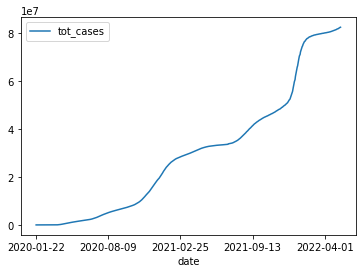

In [153]:
cumulcases = states.drop('new_case', axis=1)
cumulcases = cumulcases.drop('tot_death', axis=1)
cumulcases = cumulcases.drop('new_death', axis=1)

cumulcases = cumulcases.groupby('date').sum()

cumulcases.plot()

## 4.2 US Cumulative Deaths Plot
This plot showcases cumulative deaths in the US since the beginning of the pandemic. The cases and deaths graphs have a strong correlation.

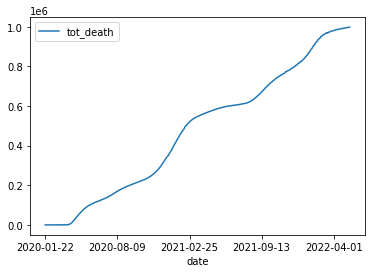

In [130]:
cumuldeaths = states.drop('new_case', axis=1)
cumuldeaths = cumuldeaths.drop('tot_cases', axis=1)
cumuldeaths = cumuldeaths.drop('new_death', axis=1)

cumuldeaths = cumuldeaths.groupby('date').sum()

cumuldeaths.plot()

## 4.3 US Time Series Cases Plot
This plot showcases new daily cases in the US since the beginning of the pandemic.

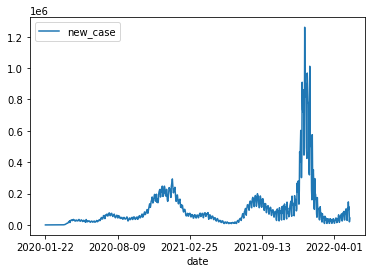

In [131]:
newcases = states.drop('tot_cases', axis=1)
newcases = newcases.drop('tot_death', axis=1)
newcases = newcases.drop('new_death', axis=1)

newcases = newcases.groupby('date').sum()

newcases.plot()

## 4.4 US Time Series Deaths Plot
This plot showcases new daily deaths in the US since the beginning of the pandemic. This plot also shadows the daily cases plot. The variation in reporting and deaths per day creates a large amount of variance in the day-to-day cases. 

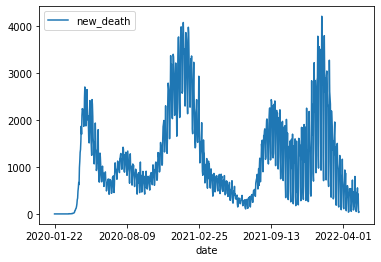

In [133]:
newdeaths = states.drop('tot_cases', axis=1)
newdeaths = newdeaths.drop('new_case', axis=1)
newdeaths = newdeaths.drop('tot_death', axis=1)

newdeaths = newdeaths.groupby('date').sum()

newdeaths.plot()

# 5 New York COVID Plots
Since New York State hospitalization data is going to be used, various plots will be displayed here showing New York's COVID data. There are some outliers/data corrections in this dataset that are visible on the graphs(such as a decrease in cumulative deaths). These are caused by errors in data collection.

## 5.1 New York Cumulative Cases
This plot showcases cumulative cases in New York State since the beginning of the pandemic.


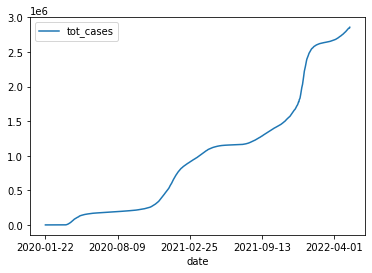

In [154]:
nycumulcases = states.drop('new_case', axis=1)
nycumulcases = nycumulcases.drop('tot_death', axis=1)
nycumulcases = nycumulcases.drop('new_death', axis=1)

nycumulcases = nycumulcases[nycumulcases.state == "NY"]
nycumulcases = nycumulcases.groupby('date').sum()

nycumulcases.plot()

## 5.2 New York Cumulative Deaths
This plot showcases cumulative deaths in New York State since the beginning of the pandemic. This plot correlates with the cases plot.

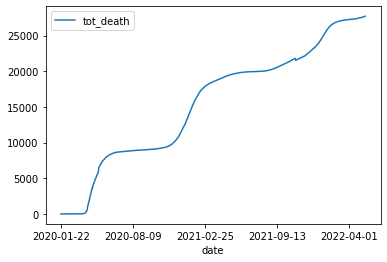

In [155]:
nycumuldeaths = states.drop('new_case', axis=1)
nycumuldeaths = nycumuldeaths.drop('tot_cases', axis=1)
nycumuldeaths = nycumuldeaths.drop('new_death', axis=1)

nycumuldeaths = nycumuldeaths[nycumuldeaths.state == "NY"]
nycumuldeaths = nycumuldeaths.groupby('date').sum()

nycumuldeaths.plot()

## 5.3 New York Time Series Cases Plot
This plot showcases new daily cases in the New York State since the beginning of the pandemic.

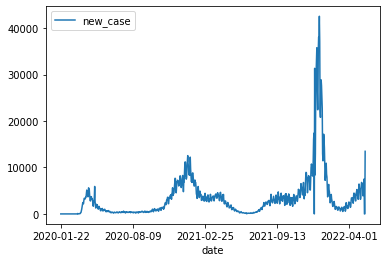

In [156]:
nydailycases = states.drop('tot_cases', axis=1)
nydailycases = nydailycases.drop('tot_death', axis=1)
nydailycases = nydailycases.drop('new_death', axis=1)

nydailycases = nydailycases[nydailycases.state == "NY"]
nydailycases = nydailycases.groupby('date').sum()

nydailycases.plot()

## 5.4 New York Time Series Deaths Plot
This plot showcases new daily deaths in the New York State since the beginning of the pandemic.

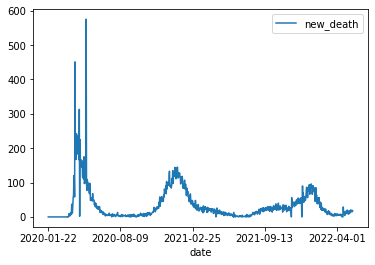

In [157]:
nydailydeaths = states.drop('tot_cases', axis=1)
nydailydeaths = nydailydeaths.drop('tot_death', axis=1)
nydailydeaths = nydailydeaths.drop('new_case', axis=1)

nydailydeaths = nydailydeaths[nydailydeaths.state == "NY"]
nydailydeaths = nydailydeaths.groupby('date').sum()

nydailydeaths.plot()

## Summary of 3 and 4
These plots all peak and trought at similar times, since New York State experienced waves of the pandemic at the same time as the rest of the country and a spike in cases is usually followed by a spike in deaths 2 weeks later. There are differences between New York State's plots and the US plots. For example, New York had its peak deaths during the first wave, at the beginning of the pandemic and smaller peaks during other waves, whereas the US as a whole had its peak deaths during its most recent wave. The Unites States' other major spike also reached a very high level of deaths, similar to its first peak and most recent peak. These variations between New York State and the US are due to differences in how NY handled the pandemic, including but not limited to lockdown restrictions, ICU capacity, travel of residents, and more. 

In addition, each peak during the pandemic had a different ratio of cases and deaths. There have been 5 major peaks in the US, each caused by a different reason. The original peak, in 2020 was due to the original strain of COVID. The US healthcare system was not prepared and COVID spread a lot.

# 6 New York State Hospitalization Data

The dataset I am using showcases hospitalization data in New York State since the beginning of the pandemic.
This dataset is incredibly detailed, and contains a row for each healthcare facility for each day, as well as plenty of other information regarding the facility and the patients at the facility that aren't neccesary for this analysis, so they will be removed.

## 6.1 The Dataset

In [167]:
nyhosp = pd.read_csv("New_York_State_Statewide_COVID-19_Hospitalizations_and_Beds.csv")
nyhosp.head()

,As of Date,Facility PFI,Facility Name,DOH Region,Facility County,Facility Network,NY Forward Region,Patients Currently Hospitalized,Patients Admitted Due to COVID,Patients Admitted Not Due to COVID,...,Patients Age Less Than 1 Year,Patients Age 1 To 4 Years,Patients Age 5 to 19 Years,Patients Age 20 to 44 Years,Patients Age 45 to 54 Years,Patients Age 55 to 64 Years,Patients Age 65 to 74 Years,Patients Age 75 to 84 Years,Patients Age Greater Than 85 Years,Hospitalized Indicator
0,03/26/2020,1,ALBANY MEDICAL CENTER HOSPITAL,CAPITAL DISTRICT REGIONAL OFFICE,ALBANY,ALBANY MEDICAL CENTER,CAPITAL REGION,12.0,NaN,NaN,...,1.0,0.0,0.0,1.0,0.0,4.0,3.0,2.0,1.0,0
1,03/26/2020,5,ST PETERS HOSPITAL,CAPITAL DISTRICT REGIONAL OFFICE,ALBANY,ST. PETERS HEALTH PARTNERS,CAPITAL REGION,10.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,3.0,4.0,2.0,1.0,0
2,03/26/2020,37,CUBA MEMORIAL HOSPITAL INC,WESTERN REGIONAL OFFICE,ALLEGANY,INDEPENDENT,WESTERN NEW YORK,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,03/26/2020,39,MEMORIAL HOSP OF WM F AND GERTRUDE F JONES AKA...,WESTERN REGIONAL OFFICE,ALLEGANY,UNIVERSITY OF ROCHESTER MEDICAL CENTER,WESTERN NEW YORK,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,03/26/2020,42,UNITED HEALTH SERVICES HOSPITALS INC - BINGHAM...,CENTRAL REGIONAL OFFICE,BROOME,"UNITED HEALTH SERVICES HOSPITALS, INC.",SOUTHERN TIER,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## 6.2 Removing Extra Columns
Columns not used are being removed here.

In [168]:
nyhosp.columns

Index(['As of Date', 'Facility PFI', 'Facility Name', 'DOH Region',
       'Facility County', 'Facility Network', 'NY Forward Region',
       'Patients Currently Hospitalized', 'Patients Admitted Due to COVID',
       'Patients Admitted Not Due to COVID', 'Patients Newly Admitted',
       'Patients Positive After Admission', 'Patients Discharged',
       'Patients Currently in ICU', 'Patients Currently ICU Intubated',
       'Patients Expired', 'Cumulative COVID-19 Discharges to Date',
       'Cumulative COVID-19 Fatalities to Date', 'Total Staffed Beds',
       'Total Staffed Beds Currently Available', 'Total Staffed ICU Beds',
       'Total Staffed ICU Beds Currently Available',
       'Total Staffed Acute Care Beds',
       'Total Staffed Acute Care Beds Occupied', 'Total Staffed ICU Beds 1',
       'Total Staffed ICU Beds Currently Occupied',
       'Total New Admissions Reported', 'Patients Age Less Than 1 Year',
       'Patients Age 1 To 4 Years', 'Patients Age 5 to 19 Years',
  

In [169]:
nyhosp = nyhosp.drop('Facility PFI', axis=1)
nyhosp = nyhosp.drop('Facility Name', axis=1)
nyhosp = nyhosp.drop('DOH Region', axis=1)
nyhosp = nyhosp.drop('Facility County', axis=1)
nyhosp = nyhosp.drop('Facility Network', axis=1)
nyhosp = nyhosp.drop('NY Forward Region', axis=1)
nyhosp = nyhosp.drop('Patients Currently Hospitalized', axis=1)
nyhosp = nyhosp.drop('Patients Positive After Admission', axis=1)
nyhosp = nyhosp.drop('Patients Discharged', axis=1)
nyhosp = nyhosp.drop('Patients Currently in ICU', axis=1)
nyhosp = nyhosp.drop('Patients Currently ICU Intubated', axis=1)
nyhosp = nyhosp.drop('Patients Expired', axis=1)
nyhosp = nyhosp.drop('Cumulative COVID-19 Discharges to Date', axis=1)
nyhosp = nyhosp.drop('Cumulative COVID-19 Fatalities to Date', axis=1)
nyhosp = nyhosp.drop('Patients Admitted Not Due to COVID', axis=1)
nyhosp = nyhosp.drop('Total Staffed Beds', axis=1)
nyhosp = nyhosp.drop('Total Staffed Beds Currently Available', axis=1)
nyhosp = nyhosp.drop('Total Staffed ICU Beds', axis=1)
nyhosp = nyhosp.drop('Total Staffed ICU Beds Currently Available', axis=1)
nyhosp = nyhosp.drop('Total Staffed Acute Care Beds', axis=1)
nyhosp = nyhosp.drop('Total Staffed Acute Care Beds Occupied', axis=1)
nyhosp = nyhosp.drop('Total Staffed ICU Beds 1', axis=1)
nyhosp = nyhosp.drop('Total Staffed ICU Beds Currently Occupied', axis=1)
nyhosp = nyhosp.drop('Total New Admissions Reported', axis=1)
nyhosp = nyhosp.drop('Patients Age Less Than 1 Year', axis=1)
nyhosp = nyhosp.drop('Patients Age 1 To 4 Years', axis=1)
nyhosp = nyhosp.drop('Patients Age 5 to 19 Years', axis=1)
nyhosp = nyhosp.drop('Patients Age 20 to 44 Years', axis=1)
nyhosp = nyhosp.drop('Patients Age 45 to 54 Years', axis=1)
nyhosp = nyhosp.drop('Patients Age 55 to 64 Years', axis=1)
nyhosp = nyhosp.drop('Patients Age 65 to 74 Years', axis=1)
nyhosp = nyhosp.drop('Patients Age 75 to 84 Years', axis=1)
nyhosp = nyhosp.drop('Patients Age Greater Than 85 Years', axis=1)
nyhosp = nyhosp.drop('Hospitalized Indicator', axis=1)


nyhosp.head()


,As of Date,Patients Admitted Due to COVID,Patients Newly Admitted
0,03/26/2020,NaN,1.0
1,03/26/2020,NaN,0.0
2,03/26/2020,NaN,0.0
3,03/26/2020,NaN,0.0
4,03/26/2020,NaN,0.0


## 6.3 Changing Date Format and Grouping
Now, I am going to change the date column so it matches a format that is better for graphing(YYYY-MM-DD).

In [170]:
nyhosp['date']= nyhosp['As of Date']

for index, crash in nyhosp.iterrows():
  nyhosp.at[index, 'date'] = re.search('(\d{4})', crash['As of Date']).group() + '-'  + re.search(r'^(\d{2})', crash['As of Date']).group() + '-' + (re.search(r'\/(\d{2})\/', crash['As of Date']).group())[1:3]

nyhosp.head()

,As of Date,Patients Admitted Due to COVID,Patients Newly Admitted,date
0,03/26/2020,NaN,1.0,2020-03-26
1,03/26/2020,NaN,0.0,2020-03-26
2,03/26/2020,NaN,0.0,2020-03-26
3,03/26/2020,NaN,0.0,2020-03-26
4,03/26/2020,NaN,0.0,2020-03-26


Now, I am going to group the data so each row corresponds to 1 date.

In [171]:
nyhosp = nyhosp.groupby('date').sum()
nyhosp

,Patients Admitted Due to COVID,Patients Newly Admitted
date,,
2020-03-26,0.0,966.0
2020-03-27,0.0,986.0
2020-03-28,0.0,1043.0
2020-03-29,0.0,926.0
2020-03-30,0.0,1050.0
...,...,...
2022-05-10,1451.0,325.0
2022-05-11,1478.0,334.0
2022-05-12,1480.0,334.0


# 7 New York State Hospitalization Graphs
Various graphs showcasing New York State Hospitalization Data

## 7.1 Newly Admitted Patients
A plot showing newly admitted patients to New York State Healthcare facilities since the beginning of the pandemic.

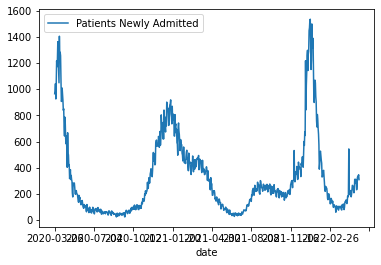

In [172]:
nap = nyhosp.drop('Patients Admitted Due to COVID', axis=1)

nap.plot()


---
## External Resources
Here are various links to some related resources, including the datasets I used, that may be helpful for understanding.

[US Cases and Deaths Data](https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36/data) via CDC

[New York State Hospitalization Data](https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Hospitalizations/jw46-jpb7/data
) via New York State


